<a href="https://colab.research.google.com/github/CHOOSLA/Self_Studying_of_Machine-Learning_and_Deep-Learning/blob/main/Chapter_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
####################################
#####이미지를 위한 인공 신경망######
####################################

##합성곱
#합성곱은 마치 입력 데이터에 마법의 도장을 찍어서 유용한 특성만 드러나게 하는 것으로 비유할 수 있다.
#7장에서 사용한 밀집충에는 뉴런마다 입력 개수만큼의 가중치가 있습니다.

#합성곱은 밀집츠으이 계산과 조금 다르다.
#밀집층은 뉴런이 100개 있다면 100개의 출력이되지만

#첫번째 뉴런이 0,1,2 번째 특성으로 가중치를 곱하여 절편을 더해서 결과가 나왔다면
#두번째 뉴런이 1,2,3 번째 특성으로 ~~
#근데 같은 가중치와 절편을 사용한다

#밀집층의 뉴런은 입력개수만큼 10개의 가중치를 가지고 1개의 출력이지만
#합성곱 층의 뉴런은 3개의 가중치를 가지고 8개의 출력을 만들었따. p425

#합성곱의 층의 뉴런에 잇는 가중치 개수는 정하기 나름이다!
#이것도,,, 하이퍼파라미터,,,

#합성곱 신경망에서는 뉴런을 필터 또는 커널이라고 부른다.
#합성곱의 장점은 1차원이 아니라 2차원 입력에도 적용할 수 있다는 것이다.

#합성곱 계산을 통해 얻은 출력을 특별히 **특성맵**이라고도 한다.

#케라스 합성곱 층

from tensorflow import keras
keras.layers.Conv2D(10,kernel_size=(3,3),activation='relu')
#잠깐! 그럼 특성 맵은 활성화 함수를 적용하기 전인가요 후인가요?
#후 입니다. 완전 연결 신경망에서 처럼 합성곱 신경망에서도 종종 활성화 함수를 언급하지 않습니다.
#일반적으로 특성맵은 활성화 함수를 통과한 값을 나타냅니다

In [ ]:
#패딩과 스트라이드

#패딩이란 입력 배열의 주위를 가상의 원소로 채우는 것을 **패딩**이라고 한다.
#패딩의 역할은 순전히 커널이 도장을 찍을 횟수를 늘려주는 것 밖에 없다.
#입력과 특성 맵의 크기를 동일하기 만들기 위해 입력 주위에 0으로 패딩하는 것을 **세임 패딩** 이라고한다.

#합성곱 신경망에서는 세임 패딩이 많이 사용된다.
#입력과 특성맵의 크기를 동일하게 만드는 경우가 아주 많다!!

#패딩 없이 순수한 입력 배열에서만 합성곱을 하여 특성 맵을 만드는 경우를 밸리드 패딩

#구석에 잇는 특성값들은 제대로 반영이 되지 않기에 패딩을 사용한다.

keras.layers.Conv2D(10,kernel_size=(3,3),activation='relu',padding='same')


#**스트라이드** 이동의 크기를 선정
#기본저긍로 스트라이드는 1입니다.

keras.layers.Conv2D(10,kernel_size=(3,3),activation='relu',padding='same',strides=1)
#오른쪽으로 이동하는 크기와 아래쪽으로 이동하는 크기를 (1,1)과 같이 튜플을 사용해 각각 지정할 수 있다.
#하지만 1보다 큰 스트라이드를 사용하는 경우 별로 없다.

#**풀링** 합성곱 층에서 만든 특성 맵의 가로세로 크기를 줄이는 역할 수행한다.
#하지만 특성맵의 개수는 줄이지 않는다.
#예를 들면 (2,2,3) 크기의 특성 맵에 풀리을 적용하면
#마지막 차원인 개수는 그대로 유지하고 너비와 높이만 줄어들어 (1,1,3)이 된다.

#폴링도 합성곱 처럼 입력 위를 지나가면서 도장을 찍는다.
#풀링에는 가중치가 ㅇ벗다. 도장을 찍은 영역에서 가장 큰 값을 고르거나 평균값을 계산한다.
#최대 폴링과 평균폴링
#폴리은 합성곱 층과 뚜렷이 구분되기 때문에 폴링층이라고 부르겠다.
#폴링은 크기가 (2,2)이면 두칸씩 이동한다.

keras.layers.MaxPooling2D(2,strides=2,padding='valid')
#풀링에서는 자동으로 스트라이드와 패딩이 지정된다.

#많은 경우 평균 폴링보다 최대 폴링을 많이 사용
#평균 폴링은 특성 맵에 잇는 중요한 정보를 평균화


In [ ]:
##합성곱 신경망의 전체구조



In [ ]:
#합성곱 신경망을 사용한 이미지 분류

#패션 MINIST 데이터 불러오기

from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input,train_target),(test_input,test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1,28,28,1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled,train_target,test_size=0.2,random_state=42
)

model = keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=3,activation='relu',padding='same',input_shape=(28,28,1)))
#이 합성곱 층은 32개의 필터를 사용한다.

model.add(keras.layers.MaxPooling2D(2))
#최대값 풀링을 통해서 특성 맵의 크기는 반으로 줄어들고 깊이는 여전히 32개

#두 번째 합성곱 - 풀링 층을 추가해보겠다

model.add(keras.layers.Conv2D(64,kernel_size=3,activation='relu',padding='same'))
model.add(keras.layers.MaxPooling2D(2))
#이러면 결국 (7,7,64)가 될 것이다.

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10,activation='softmax'))

model.summary()


#3x3x1x32 + 32= 320 
#맥스풀링으로 (14,14,32)이 되었고
#다시 3,3,32 크기의 64개의 필터로 만드니 64개의 절편이 있고
#3x3x32x64 + 64 = 18496
#여기서 맥스풀써서 필터 크기 줄여서 (7,7,64) 되고
#Flatten으로 일차원배열화 시켜서 7x7x64 = 3136이 되고
#이것을 렐루함수 거쳐서 3136 * 100 + 100 = 313700 되고
#100개 나온걸 다시 100 * 10 + 10 되서 1010개 파라미터


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               313700    
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)              

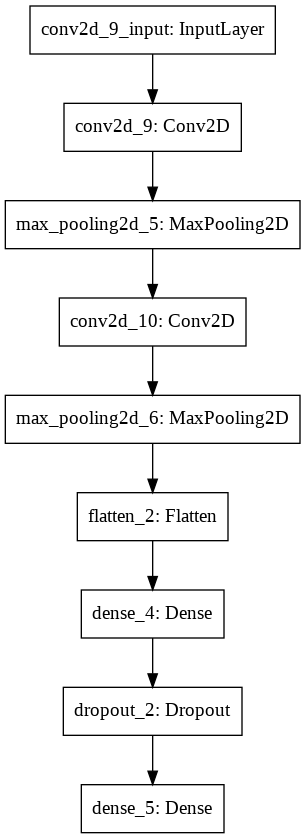

In [ ]:
keras.utils.plot_model(model)

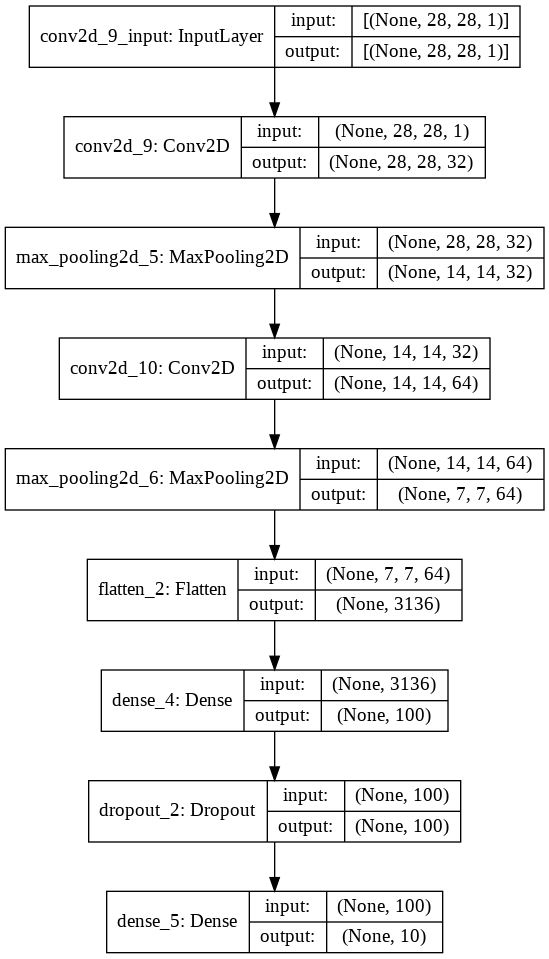

In [ ]:
keras.utils.plot_model(model,show_shapes=True)

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5',save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)
history = model.fit(train_scaled,train_target,epochs=20,validation_data=(val_scaled,val_target),callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 59s 39ms/step - loss: 0.1346 - accuracy: 0.9492 - val_loss: 0.2467 - val_accuracy: 0.9233
Epoch 2/20
1500/1500 [==============================] - 59s 39ms/step - loss: 0.1242 - accuracy: 0.9538 - val_loss: 0.2504 - val_accuracy: 0.9227
Epoch 3/20
1500/1500 [==============================] - 58s 39ms/step - loss: 0.1201 - accuracy: 0.9545 - val_loss: 0.2440 - val_accuracy: 0.9223
Epoch 4/20
1500/1500 [==============================] - 58s 39ms/step - loss: 0.1139 - accuracy: 0.9563 - val_loss: 0.2624 - val_accuracy: 0.9219
Epoch 5/20
1500/1500 [==============================] - 59s 39ms/step - loss: 0.1070 - accuracy: 0.9583 - val_loss: 0.2711 - val_accuracy: 0.9236


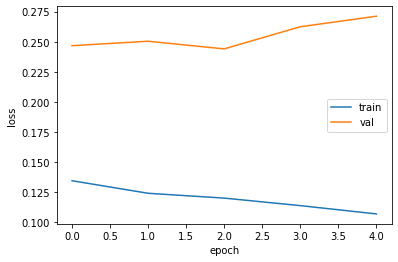

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [ ]:
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 4s 11ms/step - loss: 0.2440 - accuracy: 0.9223


[0.24401319026947021, 0.9223333597183228]

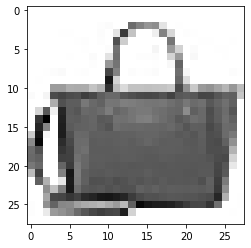

In [ ]:
plt.imshow(val_scaled[0].reshape(28,28),cmap='gray_r')
plt.show()

In [ ]:
preds = model.predict(val_scaled[0:1])
print(preds)

[[5.1525486e-31 0.0000000e+00 3.5051577e-35 1.8164908e-34 8.4707816e-31
  1.5703032e-27 4.1213703e-33 8.7894641e-37 1.0000000e+00 0.0000000e+00]]


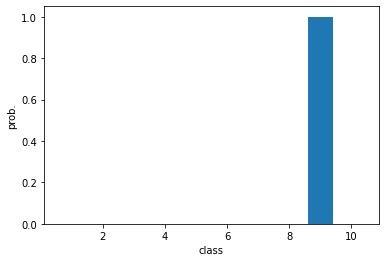

In [ ]:
plt.bar(range(1,11),preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [ ]:
classes = ['티셔츠','바지','스웨터','드레스','코드','샌달','셔츠','스니커즈','가방','앵클 부츠']
import numpy as np
print(classes[np.argmax(preds)])

가방


In [ ]:
test_sclaed = test_input.reshape(-1,28,28,1) / 255.0
model.evaluate(test_sclaed,test_target)

313/313 [==============================] - 4s 12ms/step - loss: 0.2657 - accuracy: 0.9186


[0.26574862003326416, 0.9186000227928162]

(3, 3, 1, 32) (32,)
-0.04597767 0.3309378


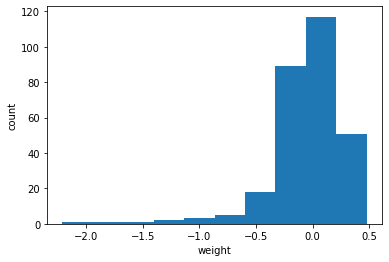

In [ ]:
#합성곱 신경망의 시각화

#가중치 시각화
#합성곱 층은 여러개의 필터를 사용해 이미제엇 특징을 학습합니다.
#각 필터는 커널이라 부르는 가중치와 절편을 가지고 있죠
#일반적으로 절편은 시각적으로 의미가 있지 않습니다.
#가중치는 입력 이미지의 2차원 영역에 적용되어 어떤 특징을 크게 두드러지게 표현하는 역할을 합니다.

from tensorflow import keras
model = keras.models.load_model('best-cnn-model.h5')
model.layers
#model.layers 리스트에 이전 절에 추가했던 Conv2D , MaxPooling2D 층이 번갈이 2번 연속 등장
#~~

conv = model.layers[0]
print(conv.weights[0].shape,conv.weights[1].shape)
#첫 번째는 가중치, 두번째는 절편을 나타낸다.
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(),conv_weights.std())
#나중에 이 값을 훈련하기 전의 가중치와 비교하겠음

import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

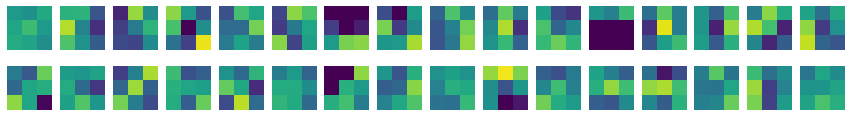

In [ ]:
fig , axs = plt.subplots(2,16,figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i,j].imshow(conv_weights[:,:,0,i*16 + j],vmin=-0.5,vmax=0.5)
    axs[i,j].axis('off')

plt.show()

(3, 3, 1, 32)
-0.009810628 0.08191325


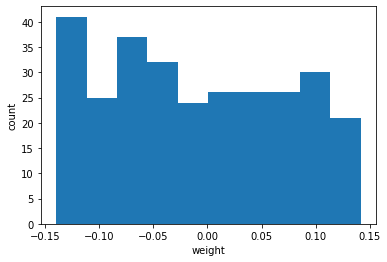

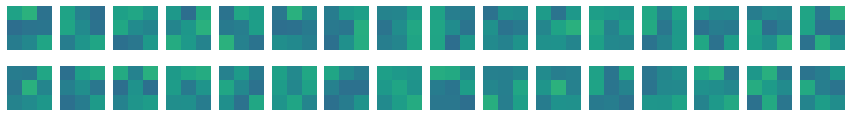

In [ ]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32,kernel_size=3,activation='relu',padding='same',input_shape=(28,28,1)))

no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(),no_training_weights.std())
#평균은 0에 가깝지만 표준편차는 매우 작다!!

plt.hist(no_training_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

fig , axs = plt.subplots(2,16,figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i,j].imshow(no_training_weights[:,:,0,i*16 + j],vmin=-0.5,vmax=0.5)
    axs[i,j].axis('off')

plt.show()
#뭔가 엄청 밍밍하다

In [ ]:
###함수형 api
#지금까지는 신경망 모델을 만들때 케라스 Sequntial 클래스를 사용했다.

#이 클래스는 층을 차례대로 쌓은 모델을 만든다.
#딥러닝에서는 좀 더 복잡한 모델이 많이 있다.
#예를들어 입력이 2개일 수도 있고 출력이 2개일 수도 있다.
#이런 경우에는 시퀀셜 클래스를 사용하기 어렵다
#이럴 때는 함수형 api를 사용한다.


dense1 = keras.layers.Dense(100,activation='sigmoid')
dense2 = keras.layers.Dense(10,activation='softmax')


inputs = keras.Input(shape=(784,))

hidden = dense1(inputs)
outputs = dense2(hidden)

model = keras.Model(inputs,outputs)

#마치 체인 처럼 입력에서 출력까지 연결하고 마지막에 Model 클래스에 입력과 출력을 지정하여
#모델을 만든다. 이렇게 모델을 만들게 되면 중간에 다양한 형태로 층을 연결할 수 있다.

conv_acti = keras.Model(model.input,model.layers[0].output)
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 784), dtype=tf.float32, name='input_3'), name='input_3', description="created by layer 'input_3'")


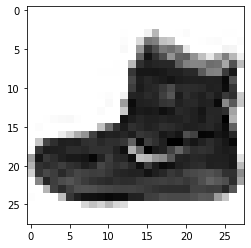

In [ ]:
##특성 맵 시각화
(train_input,train_target),(test_input,test_target) = keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0],cmap='gray_r')
plt.show()


In [ ]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=3,activation='relu',padding='same',input_shape=(28,28,1)))

inputs = train_input[0:1].reshape(-1,28,28,1) / 255.0
feature_maps = model.predict(inputs)
print(feature_maps.shape)

(1, 28, 28, 32)


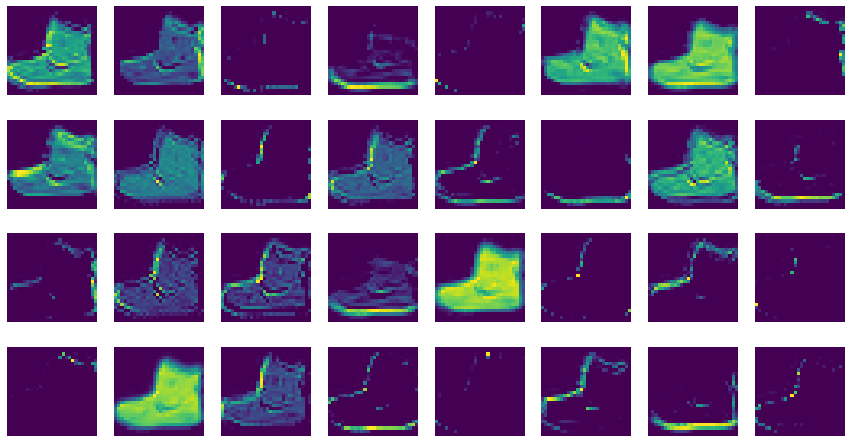

In [ ]:
fig,axs=plt.subplots(4,8,figsize=(15,8))
for i in range(4):
  for j in range(8):
    axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
    axs[i,j].axis('off')
plt.show()